In [1]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [3]:
# Load the dataset
df = pd.read_excel('abc.xlsx')

In [4]:
# Preprocess the data
# Convert categorical columns to numerical (if needed)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['multi_screen'] = df['multi_screen'].map({'yes': 1, 'no': 0})
df['mail_subscribed'] = df['mail_subscribed'].map({'yes': 1, 'no': 0})

In [5]:
# Define features (X) and target variable (y)
X = df.drop(columns=['churn', 'customer_id', 'phone_no', 'year'])  # Drop non-numeric columns
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling (important for some models like SVM, KNN, Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize base classifiers
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(50,))),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

In [8]:
# Generate predictions from base classifiers using cross-validation
rf_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
svm_pred = cross_val_predict(SVC(probability=True), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
knn_pred = cross_val_predict(KNeighborsClassifier(), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
lr_pred = cross_val_predict(LogisticRegression(), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
nb_pred = cross_val_predict(GaussianNB(), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
nn_pred = cross_val_predict(MLPClassifier(hidden_layer_sizes=(50,)), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
gb_pred = cross_val_predict(GradientBoostingClassifier(), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
dt_pred = cross_val_predict(DecisionTreeClassifier(), X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

In [9]:
# Stack the predictions
stacked_predictions = pd.DataFrame({
    'lr_pred': lr_pred,
    'nb_pred': nb_pred,
    'svm_pred': svm_pred,
    'knn_pred': knn_pred,
    'rf_pred': rf_pred,
    'nn_pred': nn_pred,
    'gb_pred': gb_pred,
    'dt_pred': dt_pred
})

In [10]:
# Train the meta-model (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_train)

# Make predictions using the meta-model
final_predictions = meta_model.predict(stacked_predictions)

# Evaluate the performance of the stacked model
accuracy = accuracy_score(y_train, final_predictions)
print(f"Stacked Model Accuracy on Training Data: {accuracy * 100:.2f}%")

Stacked Model Accuracy on Training Data: 92.56%


In [11]:
# Make predictions on the test set
# Generate predictions from base classifiers on the test set
rf_pred_test = RandomForestClassifier(n_estimators=100).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
svm_pred_test = SVC(probability=True).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
knn_pred_test = KNeighborsClassifier().fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
lr_pred_test = LogisticRegression().fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
nb_pred_test = GaussianNB().fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
nn_pred_test = MLPClassifier(hidden_layer_sizes=(50,)).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
gb_pred_test = GradientBoostingClassifier().fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
dt_pred_test = DecisionTreeClassifier().fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Stack the test predictions
stacked_test_predictions = pd.DataFrame({
    'lr_pred': lr_pred_test,
    'nb_pred': nb_pred_test,
    'svm_pred': svm_pred_test,
    'knn_pred': knn_pred_test,
    'rf_pred': rf_pred_test,
    'nn_pred': nn_pred_test,
    'gb_pred': gb_pred_test,
    'dt_pred': dt_pred_test
})

In [13]:
# Make predictions using the meta-model on the test data
final_test_predictions = meta_model.predict(stacked_test_predictions)

# Evaluate the meta-model on test data
test_accuracy = accuracy_score(y_test, final_test_predictions)
print(f"Stacked Model Accuracy on Test Data: {test_accuracy * 100:.2f}%")

Stacked Model Accuracy on Test Data: 91.00%


In [14]:
# List of base classifiers for comparison
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(50,))),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Store the accuracy for each classifier
accuracy_scores = {}

# Train each classifier and evaluate its performance on the test set
for name, model in classifiers:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[name] = accuracy

# Sort and print the accuracy scores of all classifiers
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

print("Classifier Performance (Accuracy):")
for name, score in sorted_accuracy_scores:
    print(f"{name}: {score * 100:.2f}%")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier Performance (Accuracy):
Random Forest: 91.00%
Gradient Boosting: 90.50%
Decision Tree: 88.75%
SVM: 88.00%
KNN: 88.00%
Neural Network: 87.75%
Logistic Regression: 87.00%
Naive Bayes: 83.50%


In [15]:
# Checking the distribution of the 'churn' column
churn_counts = df['churn'].value_counts()
print(churn_counts)

churn
0    1738
1     262
Name: count, dtype: int64


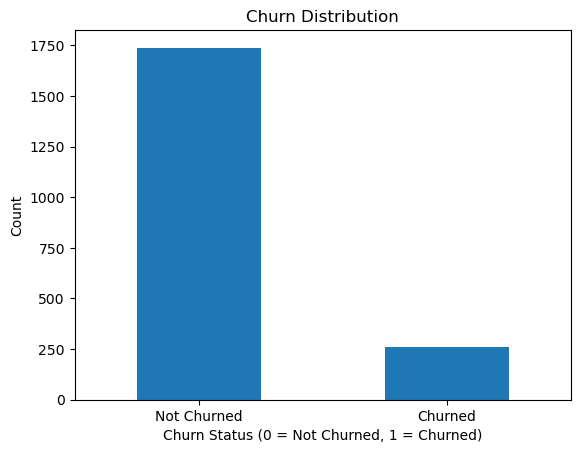

In [44]:
import matplotlib.pyplot as plt

# Plotting the distribution of churn
churn_counts.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn Status (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.show()

In [17]:
# reason for better performance of tree based models

In [18]:
# the objective of doing this is to find out which model performs well for our dataset. we found that using the random forest stacking 
# the tree based models are showing the highest accuracy (random forrest, GBM and Decision tree) than the other. it can be commented that 
# this observation is caused becuase of the class imbalance in the data (one class dominating the other in our case not churned >> churned)
# it is well evident from the above plot of count vs churn status that there is a clear class imbalance which led to tree based models being 
# highly accurate. 

                        year  customer_id    gender       age  \
year                     NaN          NaN       NaN       NaN   
customer_id              NaN     1.000000  0.012224  0.023830   
gender                   NaN     0.012224  1.000000  0.008814   
age                      NaN     0.023830  0.008814  1.000000   
no_of_days_subscribed    NaN    -0.011457  0.001785  0.038822   
multi_screen             NaN    -0.037957 -0.011341  0.002835   
mail_subscribed          NaN    -0.054181  0.046537 -0.011570   
weekly_mins_watched      NaN    -0.013830 -0.002754  0.016316   
minimum_daily_mins       NaN     0.033733 -0.013182 -0.000676   
maximum_daily_mins       NaN    -0.013834 -0.002742  0.016328   
weekly_max_night_mins    NaN     0.009713 -0.033571  0.016645   
videos_watched           NaN     0.063967 -0.027563  0.013076   
maximum_days_inactive    NaN     0.047070 -0.027430  0.006334   
customer_support_calls   NaN    -0.036009 -0.007537  0.000618   
churn                    

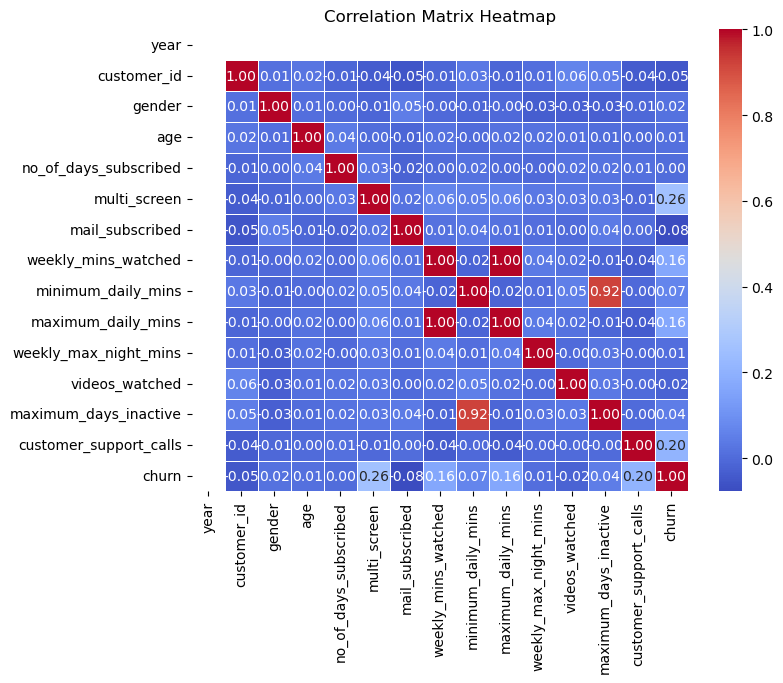

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into the 'df' DataFrame
# Select only numeric columns to calculate correlations
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
#reason for weak performance of naive bayes

In [21]:
# the weak performance of naive bayes is might be a because of the correlation between the features. we can observe that from the correlation
# matrix above 
# 1. maximum_daily_mins and weekly_mins_watched are highly correlated (1.0)
# 2. minimum_daily_mins and maximum_days_inactive show a strong positive correlation (0.923740)
# 3. multi_screen (0.258324); weekly_mins_watched (0.162876); maximum_daily_mins (0.162874); customer_support_calls (0.204774)
# has a modest positive correlation with the target feature churn
# these factors are the cause for the poor performance of naive bayes because the underlying assumption of Naive Bayes is that 
#features are conditionally independent given the class. 